In [214]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests

In [215]:
URL = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-08/ipf_lifts.csv'

req = requests.get(URL)

In [216]:
match req.status_code:
    case 200: 
        df = pd.read_csv(URL)
    case 404: 
        raise 'Problem with connection'
    case _ :
        raise f'Something wrong {req.status_code}'

In [217]:
df.shape

(41152, 16)

In [218]:
df.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
0,Hiroyuki Isagawa,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,205.0,140.0,225.0,1,1985-08-03,IPF,World Games
1,David Mannering,M,SBD,Single-ply,24.0,24-34,NaN,67.5,67.5,225.0,132.5,235.0,2,1985-08-03,IPF,World Games
2,Eddy Pengelly,M,SBD,Single-ply,35.5,35-39,NaN,67.5,67.5,245.0,157.5,270.0,3,1985-08-03,IPF,World Games
3,Nanda Talambanua,M,SBD,Single-ply,19.5,20-23,NaN,67.5,67.5,195.0,110.0,240.0,4,1985-08-03,IPF,World Games
4,Göran Henrysson,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,240.0,140.0,215.0,5,1985-08-03,IPF,World Games


In [219]:
df.tail()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
41147,Chien-Hsiung Chao,M,B,Single-ply,NaN,NaN,Open,126.5,125+,NaN,202.5,NaN,12,1995-06-25,IPF,World Bench Press Championships
41148,Oleg Gordynetz,M,B,Single-ply,NaN,NaN,Open,137.5,125+,NaN,202.5,NaN,13,1995-06-25,IPF,World Bench Press Championships
41149,Clive Lambert,M,B,Single-ply,31.5,24-34,Open,142.2,125+,NaN,202.5,NaN,14,1995-06-25,IPF,World Bench Press Championships
41150,Peter Brath,M,B,Single-ply,21.5,20-23,Open,125.5,125+,NaN,180.0,NaN,15,1995-06-25,IPF,World Bench Press Championships
41151,Valery Sidorenko,M,B,Single-ply,38.5,35-39,Open,142.0,125+,NaN,NaN,NaN,DQ,1995-06-25,IPF,World Bench Press Championships


In [220]:
df.sample(5)

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
3834,Yrjö Haatanen,M,SBD,Single-ply,NaN,NaN,Open,56.00,56,190.0,122.5,215.0,4,1980-11-07,IPF,Men's World Powerlifting Championships
12278,Jordan Berke,M,SBD,Raw,24.5,24-34,Open,72.85,74,217.5,160.0,245.0,10,2014-06-01,IPF,World Classic Powerlifting Championships
1754,Istvan Nanasi,M,B,Raw,NaN,NaN,NaN,100.00,100,NaN,190.0,NaN,1,1990-12-16,IPF,World Disabled Bench Press Championships
15972,Sergey Asaturov,M,SBD,Single-ply,26.5,24-34,Open,73.37,74,200.0,190.0,200.0,12,2011-11-08,IPF,World Powerlifting Championships
13436,Sofya Shtykova,F,SBD,Single-ply,19.5,20-23,Open,59.70,60,155.0,90.0,147.5,1,2002-04-12,IPF,World Students Cup


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41152 entries, 0 to 41151
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41152 non-null  object 
 1   sex               41152 non-null  object 
 2   event             41152 non-null  object 
 3   equipment         41152 non-null  object 
 4   age               38246 non-null  float64
 5   age_class         38268 non-null  object 
 6   division          40525 non-null  object 
 7   bodyweight_kg     40965 non-null  float64
 8   weight_class_kg   41151 non-null  object 
 9   best3squat_kg     27454 non-null  float64
 10  best3bench_kg     38690 non-null  float64
 11  best3deadlift_kg  27124 non-null  float64
 12  place             41152 non-null  object 
 13  date              41152 non-null  object 
 14  federation        41152 non-null  object 
 15  meet_name         41152 non-null  object 
dtypes: float64(5), object(11)
memory usage: 

In [222]:
df.describe()

,age,bodyweight_kg,best3squat_kg,best3bench_kg,best3deadlift_kg
count,38246.000000,40965.000000,27454.000000,38690.000000,27124.000000
mean,34.772708,81.148902,217.552650,144.677881,221.835002
std,14.618234,24.930896,74.614728,60.032659,63.717025
min,0.500000,37.290000,-210.000000,-160.000000,-215.000000
25%,22.500000,60.000000,160.000000,97.500000,170.000000
50%,31.500000,75.550000,215.000000,140.000000,222.500000
75%,45.000000,97.300000,270.000000,185.000000,270.000000
max,93.500000,240.000000,490.000000,415.000000,420.000000


In [223]:
df.isnull().sum()

name                    0
sex                     0
event                   0
equipment               0
age                  2906
age_class            2884
division              627
bodyweight_kg         187
weight_class_kg         1
best3squat_kg       13698
best3bench_kg        2462
best3deadlift_kg    14028
place                   0
date                    0
federation              0
meet_name               0
dtype: int64

1. Знайдіть рекорди для кожної статі та кожного підрозділу в кожному з 3-х - жим лежачи(best3bench_kg), присідання(best3squat_kg) та станова тяга(best3deadlift_kg)).

In [224]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [225]:
df['division'].unique()

array([nan, 'Open', 'Juniors', 'Light', 'Middle', 'Heavy', 'Super',
       'Sub-Juniors', 'Masters 1', 'Masters 2', 'Masters 3', 'Masters 4',
       'SuperHeavy'], dtype=object)

In [226]:
df.groupby(['sex', 'division'])[['best3squat_kg', 'best3bench_kg', 'best3deadlift_kg']].max()

best3squat_kg  best3bench_kg  best3deadlift_kg
sex division                                                   
F   Heavy                305.0          192.5             248.5
    Juniors              282.5          190.5             252.5
    Light                220.0          150.0             202.5
    Masters 1            245.0          197.5             248.0
    Masters 2            255.0          172.5             227.5
    Masters 3            210.0          140.0             190.0
    Masters 4            135.0          115.0             142.5
    Middle               247.5          170.0             235.0
    Open                 322.5          235.0             270.5
    Sub-Juniors          265.0          170.0             238.0
    Super                267.5          190.0             245.0
    SuperHeavy           310.5          205.0             247.5
M   Heavy                432.0          330.0             382.5
    Juniors              450.0          375.0             377.5
    Light                325.5          217.5             315.0
    Masters 1            405.0          345.0             395.0
    Masters 2            365.0          310.5             335.0
    Masters 3            300.0          260.0             305.0
    Masters 4            235.0          220.0             260.5
    Middle               370.0          268.5             345.0
    Open                 490.0          415.0             407.5
    Sub-Juniors          370.0          310.0             335.0
    Super                465.0          360.0             387.5
    SuperHeavy           475.0          405.0             420.0

<Axes: xlabel='division', ylabel='best3squat_kg'>

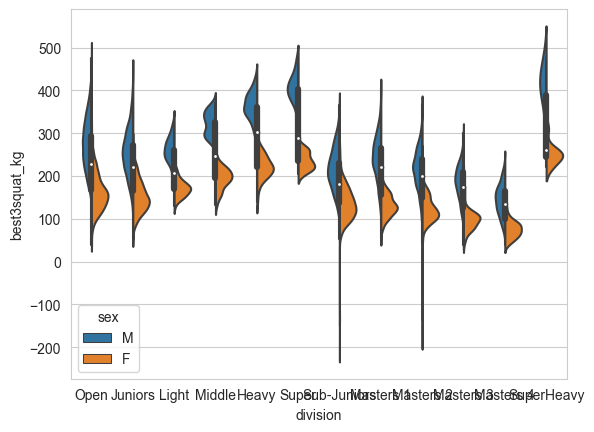

In [227]:
sns.violinplot(data=df, x='division', y='best3squat_kg', hue='sex', split = True)

<Axes: xlabel='best3bench_kg', ylabel='division'>

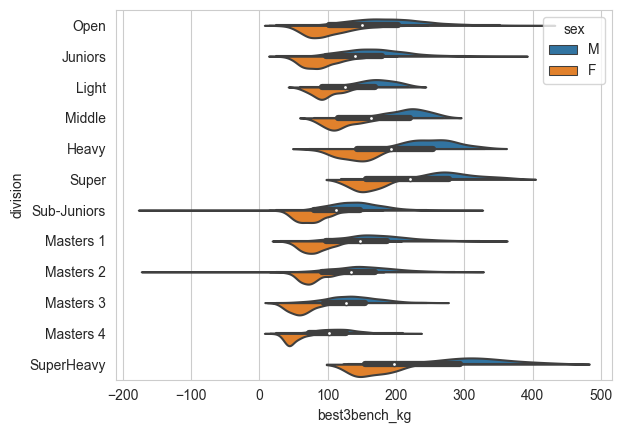

In [228]:
sns.violinplot(data=df, y='division', x='best3bench_kg', hue='sex', split = True)

<Axes: xlabel='best3deadlift_kg', ylabel='division'>

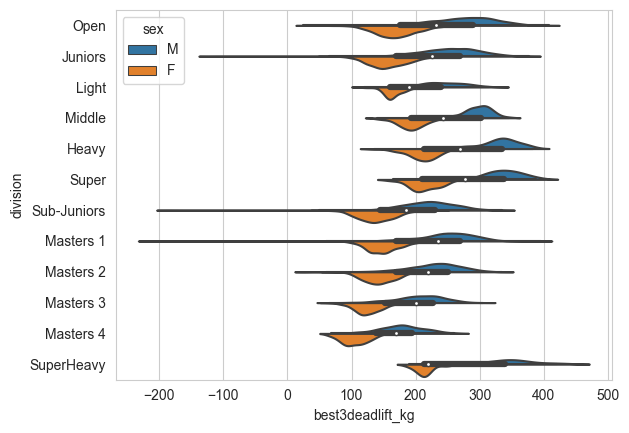

In [229]:
sns.violinplot(data=df, y='division', x='best3deadlift_kg', hue='sex', split = True)

2. Порахуйте кількість перемог кожного учасника, беручи за перемогу 1-е місце. Збережіть результати у новому DataFrame.

In [230]:
df_victories = df[df['place'] == '1']
victories_count = df_victories.groupby('name')['place'].count()
victories_count

name
A Ernandos-Ortega            1
A. Raface                    1
Aarre Käpylä                 2
Ab Wolders                   3
Abdulkarim Karaman           4
                            ..
Éva Makrai                   2
Øyvind Bjørnsen              1
Þórunn Brynja Jónasdóttir    1
Štefan Koľšovský             7
Štěpánka Židová              1
Name: place, Length: 3328, dtype: int64

In [231]:
df2 = pd.merge(df, victories_count, how='left', left_on='name', right_index=True)
df2.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place_x,date,federation,meet_name,place_y
0,Hiroyuki Isagawa,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,205.0,140.0,225.0,1,1985-08-03,IPF,World Games,21.0
1,David Mannering,M,SBD,Single-ply,24.0,24-34,NaN,67.5,67.5,225.0,132.5,235.0,2,1985-08-03,IPF,World Games,NaN
2,Eddy Pengelly,M,SBD,Single-ply,35.5,35-39,NaN,67.5,67.5,245.0,157.5,270.0,3,1985-08-03,IPF,World Games,4.0
3,Nanda Talambanua,M,SBD,Single-ply,19.5,20-23,NaN,67.5,67.5,195.0,110.0,240.0,4,1985-08-03,IPF,World Games,4.0
4,Göran Henrysson,M,SBD,Single-ply,NaN,NaN,NaN,67.5,67.5,240.0,140.0,215.0,5,1985-08-03,IPF,World Games,4.0


3. Використовуйте DataFrame з вправи 2, щоб показати для кожної комбінації підрозділу( division ) та статі( sex ), учасника з найбільшою кількістю перемог серед учасників, які будь-коли брали участь у цьому дивізіоні.

In [232]:
max_victories__in_division = df2.groupby(['division', 'sex'])['place_y'].max()
max_victories__in_division

division     sex
Heavy        F      22.0
             M      11.0
Juniors      F      12.0
             M      24.0
Light        F      14.0
             M      28.0
Masters 1    F      22.0
             M      21.0
Masters 2    F      20.0
             M      28.0
Masters 3    F      20.0
             M      21.0
Masters 4    F      16.0
             M      13.0
Middle       F      17.0
             M      21.0
Open         F      22.0
             M      28.0
Sub-Juniors  F      14.0
             M       8.0
Super        F      22.0
             M       8.0
SuperHeavy   F      22.0
             M       8.0
Name: place_y, dtype: float64

In [233]:
df_copy=df2[['division', 'sex', 'place_y', 'name']].copy()
df_copy

,division,sex,place_y,name
0,NaN,M,21.0,Hiroyuki Isagawa
1,NaN,M,NaN,David Mannering
2,NaN,M,4.0,Eddy Pengelly
3,NaN,M,4.0,Nanda Talambanua
4,NaN,M,4.0,Göran Henrysson
...,...,...,...,...
41147,Open,M,NaN,Chien-Hsiung Chao
41148,Open,M,NaN,Oleg Gordynetz
41149,Open,M,NaN,Clive Lambert
41150,Open,M,NaN,Peter Brath


In [234]:
df3 = pd.merge(max_victories__in_division, df5, how='inner', left_on=['division', 'sex', 'place_y'], right_on=['division', 'sex', 'place_y'])
df3

,division,sex,place_y,name
0,Heavy,F,22.0,Ielja Strik
1,Heavy,M,11.0,Jan Wegiera
2,Heavy,M,11.0,Jan Wegiera
3,Juniors,F,12.0,Marina Kudinova
4,Juniors,F,12.0,Natalia Salnikova
...,...,...,...,...
150,Super,F,22.0,Ielja Strik
151,Super,M,8.0,Kenneth Sandvik
152,Super,M,8.0,Daisuke Midote
153,SuperHeavy,F,22.0,Ielja Strik


In [235]:
df3.drop_duplicates(inplace = True)
df3

,division,sex,place_y,name
0,Heavy,F,22.0,Ielja Strik
1,Heavy,M,11.0,Jan Wegiera
3,Juniors,F,12.0,Marina Kudinova
4,Juniors,F,12.0,Natalia Salnikova
6,Juniors,F,12.0,Svetlana Tesleva
7,Juniors,F,12.0,Chen-Yeh Chao
13,Juniors,M,24.0,Andrzej Stanaszek
14,Juniors,M,24.0,Sergey Fedosienko
19,Light,F,14.0,Yukako Fukushima
24,Light,M,28.0,Hideaki Inaba
